# ***PROBLEM STATEMENT***
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies.

**What we wish to achieve:-**
From the data provided, we have to find suitable target customers for our sales and marketing team at Scaler.

Approach we are going to use to do this is by segmenting based on ctc,company_hash, job_position and other features which is created to help us in forming better clusters.

***Data Dictionary***

Unnamed 0’ - Index of the dataset


Email_hash - Anonymised Personal Identifiable Information (PII)


Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.


orgyear - Employment start date


CTC - Current CTC


Job_position - Job profile in the company


CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)




In [1]:
#Lets import our dataset
import numpy as np
import pandas as pd

df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

In [2]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [4]:
df.shape

(205843, 7)

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [7]:
#Drop the duplicates
df.drop_duplicates(inplace=True)
df.shape

(205809, 6)

In [8]:
df["ctc_updated_year"].value_counts()

ctc_updated_year
2019.0    68665
2021.0    64974
2020.0    49435
2017.0     7561
2018.0     6746
2016.0     5501
2015.0     2927
Name: count, dtype: int64

In [9]:
df["company_hash"].isna().sum()

44

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205809 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205765 non-null  object 
 1   email_hash        205809 non-null  object 
 2   orgyear           205723 non-null  float64
 3   ctc               205809 non-null  int64  
 4   job_position      153261 non-null  object 
 5   ctc_updated_year  205809 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [11]:
df["orgyear"].isna().sum()

86

# **Dealing with Missing Values**

In [12]:
# Define a function to fill missing values of orgyear column with median value of orgyear for each company
import numpy as np

median_orgyear = df.groupby('company_hash')['orgyear'].median()

def median_imputation(table, main_col, null_col):
    if np.isnan(null_col):
        return table[main_col]
    else:
        return null_col
#can do knn imputation as well
df['orgyear']=df.apply(lambda x: median_imputation(median_orgyear,x['company_hash'],x['orgyear'] ), axis=1)

In [13]:
df["orgyear"].isna().sum()

26

In [14]:
df.dropna(subset=["orgyear","company_hash"],axis=0,inplace=True)

In [15]:
df.shape

(205739, 6)

In [16]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52512
ctc_updated_year        0
dtype: int64

In [17]:
#Now lets remove special characters from job_position
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z0-9 ]+', '', string)
    return new_string

df.job_position=df.job_position.apply(lambda x: remove_special(str(x)))
df.job_position=df.job_position.apply(lambda x: x.lower())
df.job_position=df.job_position.apply(lambda x: x.strip())


In [18]:
df.drop_duplicates(inplace=True)
df.shape

(205641, 6)

In [19]:
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

# **Dealing with Outliers**

In [20]:
sorted(df['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

In [21]:
df = df[~df['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900, 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
2204,
20165])]

In [22]:
df.shape

(205259, 6)

In [23]:
sorted(df['ctc_updated_year'].fillna(0).astype(int).unique())

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [24]:
#Now lets Mask the companies which has less than 5 data points as "Others"

df=df.apply(lambda x: x.mask(x.map(x.value_counts())< 5,'Others') if x.name=='company_hash' else x)

In [25]:
df.company_hash.value_counts()

company_hash
Others                       47775
nvnv wgzohrnvzwj otqcxwto     8331
xzegojo                       5376
vbvkgz                        3473
zgn vuurxwvmrt vwwghzn        3378
                             ...  
qggevzaerggqwgb                  5
bxwqgonqvntsj                    5
havvz                            5
ltoho wvrro                      5
fxuqg                            5
Name: count, Length: 3775, dtype: int64

In [26]:
#Removing outliers from ctc using IQR

# Function to remove outliers using IQR method
def remove_outliers(group):
    q1 = group['ctc'].quantile(0.25)
    q3 = group['ctc'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (group['ctc'] < lower_bound) | (group['ctc'] > upper_bound)
    group.loc[outliers, 'ctc'] = float('NaN')
    return group

# Group by company_hash and remove outliers in ctc column
df = df.groupby('company_hash').apply(remove_outliers)

# Remove rows with NaN values in ctc column
df = df.dropna(subset=['ctc'])

C:\Users\prana\AppData\Local\Temp\ipykernel_13828\663679128.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('company_hash').apply(remove_outliers)


In [27]:
df.shape

(191374, 6)

In [28]:
df.company_hash.value_counts()

company_hash
Others                        44144
nvnv wgzohrnvzwj otqcxwto      7764
xzegojo                        4997
vbvkgz                         3352
zgn vuurxwvmrt vwwghzn         3102
                              ...  
ztdnttq vhngbgnxct                3
wgbuxzaxv xzegntwy ucn rna        3
bvoyqti mvzp                      3
oyqxqvb wxnj hzxgz exzvzwt        3
qtugqnsvqatz ntwyzgrgsxto         3
Name: count, Length: 3775, dtype: int64

In [29]:
# Filter rows where ctc column value is more than 120000
df = df[df['ctc'] > 120000]
df.shape

(184853, 6)

# **Masking some company_hash values as 'Others'**

In [30]:
#Now lets Mask the companies which has less than 5 data points as "Others"

df=df.apply(lambda x: x.mask(x.map(x.value_counts())< 5,'Others') if x.name=='company_hash' else x)
df.company_hash.value_counts()

company_hash
Others                       42298
nvnv wgzohrnvzwj otqcxwto     7658
xzegojo                       4896
vbvkgz                        3290
wgszxkvzn                     2947
                             ...  
mgra ntwyzgrgsxto                5
xqgz bghznvxz                    5
pcvznhb xzw                      5
awm mvzp                         5
vhqho                            5
Name: count, Length: 3412, dtype: int64

In [31]:
#Creating a new feature named YearsToGetCTCupdated
df["YearsToGetCTCupdated"] = df["ctc_updated_year"] - df["orgyear"]

In [32]:
df

company_hash  \
company_hash                       
1bs          4276            1bs   
             20629           1bs   
             25213           1bs   
             31967           1bs   
             34400           1bs   
...                          ...   
zxztrtvuo    189619    zxztrtvuo   
             190739    zxztrtvuo   
             192860    zxztrtvuo   
             196809    zxztrtvuo   
             197272    zxztrtvuo   

                                                            email_hash  \
company_hash                                                             
1bs          4276    4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...   
             20629   a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...   
             25213   32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...   
             31967   6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...   
             34400   13f9b6b7b59baa88d975991323dabdd66424550d633a88...   
...                                                                ...   
zxztrtvuo    189619  71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...   
             190739  c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...   
             192860  10d566c5fca40ffe1d133b79594d071880711ef480da9f...   
             196809  b5628c03989a151f60c89e726351817c3a62078e7c70de...   
             197272  88534a8bc32c10480086fe9dac0375caeb489539561eee...   

                     orgyear        ctc        job_position  ctc_updated_year  \
company_hash                                                                    
1bs          4276     2019.0  1000000.0                 nan            2020.0   
             20629    2014.0  1600000.0  fullstack engineer            2021.0   
             25213    2013.0  2000000.0                 nan            2021.0   
             31967    2019.0   600000.0    android engineer            2020.0   
             34400    2017.0  1000000.0    backend engineer            2021.0   
...                      ...        ...                 ...               ...   
zxztrtvuo    189619   2016.0  1125000.0    android engineer            2019.0   
             190739   2018.0   600000.0   frontend engineer            2020.0   
             192860   2017.0  1400000.0      data scientist            2019.0   
             196809   2016.0   575000.0  fullstack engineer            2019.0   
             197272   2019.0   450000.0   frontend engineer            2020.0   

                     YearsToGetCTCupdated  
company_hash                               
1bs          4276                     1.0  
             20629                    7.0  
             25213                    8.0  
             31967                    1.0  
             34400                    4.0  
...                                   ...  
zxztrtvuo    189619                   3.0  
             190739                   2.0  
             192860                   2.0  
             196809                   3.0  
             197272                   1.0  

[184853 rows x 7 columns]

In [33]:
df.drop(["company_hash"],axis=1,inplace=True)
df

email_hash  \
company_hash                                                             
1bs          4276    4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...   
             20629   a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...   
             25213   32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...   
             31967   6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...   
             34400   13f9b6b7b59baa88d975991323dabdd66424550d633a88...   
...                                                                ...   
zxztrtvuo    189619  71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...   
             190739  c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...   
             192860  10d566c5fca40ffe1d133b79594d071880711ef480da9f...   
             196809  b5628c03989a151f60c89e726351817c3a62078e7c70de...   
             197272  88534a8bc32c10480086fe9dac0375caeb489539561eee...   

                     orgyear        ctc        job_position  ctc_updated_year  \
company_hash                                                                    
1bs          4276     2019.0  1000000.0                 nan            2020.0   
             20629    2014.0  1600000.0  fullstack engineer            2021.0   
             25213    2013.0  2000000.0                 nan            2021.0   
             31967    2019.0   600000.0    android engineer            2020.0   
             34400    2017.0  1000000.0    backend engineer            2021.0   
...                      ...        ...                 ...               ...   
zxztrtvuo    189619   2016.0  1125000.0    android engineer            2019.0   
             190739   2018.0   600000.0   frontend engineer            2020.0   
             192860   2017.0  1400000.0      data scientist            2019.0   
             196809   2016.0   575000.0  fullstack engineer            2019.0   
             197272   2019.0   450000.0   frontend engineer            2020.0   

                     YearsToGetCTCupdated  
company_hash                               
1bs          4276                     1.0  
             20629                    7.0  
             25213                    8.0  
             31967                    1.0  
             34400                    4.0  
...                                   ...  
zxztrtvuo    189619                   3.0  
             190739                   2.0  
             192860                   2.0  
             196809                   3.0  
             197272                   1.0  

[184853 rows x 6 columns]

In [34]:
df.reset_index(inplace=True)
df

,company_hash,level_1,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated
0,1bs,4276,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,nan,2020.0,1.0
1,1bs,20629,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014.0,1600000.0,fullstack engineer,2021.0,7.0
2,1bs,25213,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,nan,2021.0,8.0
3,1bs,31967,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,2019.0,600000.0,android engineer,2020.0,1.0
4,1bs,34400,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0
...,...,...,...,...,...,...,...,...
184848,zxztrtvuo,189619,71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...,2016.0,1125000.0,android engineer,2019.0,3.0
184849,zxztrtvuo,190739,c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...,2018.0,600000.0,frontend engineer,2020.0,2.0
184850,zxztrtvuo,192860,10d566c5fca40ffe1d133b79594d071880711ef480da9f...,2017.0,1400000.0,data scientist,2019.0,2.0
184851,zxztrtvuo,196809,b5628c03989a151f60c89e726351817c3a62078e7c70de...,2016.0,575000.0,fullstack engineer,2019.0,3.0


In [35]:
df.drop(["level_1"],axis=1,inplace=True)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated
0,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,nan,2020.0,1.0
1,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014.0,1600000.0,fullstack engineer,2021.0,7.0
2,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,nan,2021.0,8.0
3,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,2019.0,600000.0,android engineer,2020.0,1.0
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0
...,...,...,...,...,...,...,...
184848,zxztrtvuo,71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...,2016.0,1125000.0,android engineer,2019.0,3.0
184849,zxztrtvuo,c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...,2018.0,600000.0,frontend engineer,2020.0,2.0
184850,zxztrtvuo,10d566c5fca40ffe1d133b79594d071880711ef480da9f...,2017.0,1400000.0,data scientist,2019.0,2.0
184851,zxztrtvuo,b5628c03989a151f60c89e726351817c3a62078e7c70de...,2016.0,575000.0,fullstack engineer,2019.0,3.0


In [36]:
df["YearsToGetCTCupdated"].unique()

array([ 1. ,  7. ,  8. ,  4. ,  3. , -1. ,  5. ,  2. , 11. , 25. ,  6. ,
        0. , 14. ,  9. , 18. , 10. , 13. , 16. , 17. , -2. , 12. , 24. ,
       20. , 15. , 19. , 23. , -3. , 26. , 22. , 30. , 28. , 21. , 29. ,
       -4. , 44. , 33. , -5. , 27. , 31. , 50. , -6. , 35. , 42. ,  7.5,
       38. , 36. ,  5.5, 40. , 47. , 34. ,  2.5, 32. ])

In [37]:
df = df[~(df['YearsToGetCTCupdated']<0)]

In [38]:
df.shape

(177589, 7)

In [39]:
df.nunique()

company_hash              3761
email_hash              131296
orgyear                     47
ctc                       2257
job_position               779
ctc_updated_year             7
YearsToGetCTCupdated        46
dtype: int64

In [40]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position            0
ctc_updated_year        0
YearsToGetCTCupdated    0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)
df.shape

C:\Users\prana\AppData\Local\Temp\ipykernel_13828\3054484884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


(177523, 7)

In [42]:
df["yearsofexperience"] = 2022 - df["orgyear"]

C:\Users\prana\AppData\Local\Temp\ipykernel_13828\1443348984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["yearsofexperience"] = 2022 - df["orgyear"]


In [43]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience
0,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,nan,2020.0,1.0,3.0
1,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014.0,1600000.0,fullstack engineer,2021.0,7.0,8.0
2,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,nan,2021.0,8.0,9.0
3,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,2019.0,600000.0,android engineer,2020.0,1.0,3.0
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0,5.0
...,...,...,...,...,...,...,...,...
184848,zxztrtvuo,71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...,2016.0,1125000.0,android engineer,2019.0,3.0,6.0
184849,zxztrtvuo,c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...,2018.0,600000.0,frontend engineer,2020.0,2.0,4.0
184850,zxztrtvuo,10d566c5fca40ffe1d133b79594d071880711ef480da9f...,2017.0,1400000.0,data scientist,2019.0,2.0,5.0
184851,zxztrtvuo,b5628c03989a151f60c89e726351817c3a62078e7c70de...,2016.0,575000.0,fullstack engineer,2019.0,3.0,6.0


In [44]:
df[df["job_position"]=="nan"]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience
0,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,nan,2020.0,1.0,3.0
2,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,nan,2021.0,8.0,9.0
6,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,2019.0,600000.0,nan,2020.0,1.0,3.0
7,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014.0,1600000.0,nan,2021.0,7.0,8.0
8,1bs,6b01808bba4c2d50258b068274232251620630cb252a9c...,2018.0,900000.0,nan,2021.0,3.0,4.0
...,...,...,...,...,...,...,...,...
184820,zxztrtvuo,f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...,2019.0,1250000.0,nan,2021.0,2.0,3.0
184824,zxztrtvuo,4a5bc81d942bb281d18a27b6ceb622de65d07a13bc5ab9...,2014.0,1275000.0,nan,2020.0,6.0,8.0
184825,zxztrtvuo,d5b98d92628266c2037e78a367db956c140585fa027171...,2019.0,500000.0,nan,2021.0,2.0,3.0
184829,zxztrtvuo,f230cabdfbe43c7fe4ba66629b0fa9e058b1fd613dc232...,2020.0,450000.0,nan,2020.0,0.0,2.0


In [45]:
df["job_position"] = df["job_position"].replace("nan",np.nan)

C:\Users\prana\AppData\Local\Temp\ipykernel_13828\317166957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job_position"] = df["job_position"].replace("nan",np.nan)


In [46]:
df.isna().sum()

company_hash                0
email_hash                  0
orgyear                     0
ctc                         0
job_position            44803
ctc_updated_year            0
YearsToGetCTCupdated        0
yearsofexperience           0
dtype: int64

In [47]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience
0,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,NaN,2020.0,1.0,3.0
1,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,2014.0,1600000.0,fullstack engineer,2021.0,7.0,8.0
2,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,NaN,2021.0,8.0,9.0
3,1bs,6cb3cf1291c0a186d4d1ed254c0e5b95f8498bccc814d5...,2019.0,600000.0,android engineer,2020.0,1.0,3.0
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0,5.0
...,...,...,...,...,...,...,...,...
184848,zxztrtvuo,71756b7d0edd74057e2d4a480f8b1fc02e452c2aeb90a5...,2016.0,1125000.0,android engineer,2019.0,3.0,6.0
184849,zxztrtvuo,c6eadfb4d07401dedcb7f02908a171ad9cf43b96dd47ab...,2018.0,600000.0,frontend engineer,2020.0,2.0,4.0
184850,zxztrtvuo,10d566c5fca40ffe1d133b79594d071880711ef480da9f...,2017.0,1400000.0,data scientist,2019.0,2.0,5.0
184851,zxztrtvuo,b5628c03989a151f60c89e726351817c3a62078e7c70de...,2016.0,575000.0,fullstack engineer,2019.0,3.0,6.0


# **Dealing with Missing Values in job_position**

In [48]:
#Now lets try to impute missing job positions by creating a group of company,email,ctc,orgyear and filling with the most occuring job position
import pandas as pd

# Function to fill missing values with mode
def fill_mode(group):
    mode_value = group['job_position'].mode()
    group['job_position'] = group['job_position'].fillna(mode_value[0] if not mode_value.empty else pd.NA)
    return group

# Applying the function to each group and concatenating the results
df = df.groupby(["company_hash", "email_hash", "ctc", "orgyear"]).apply(fill_mode)



C:\Users\prana\AppData\Local\Temp\ipykernel_13828\35876102.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["company_hash", "email_hash", "ctc", "orgyear"]).apply(fill_mode)


In [49]:
df.isna().sum()

company_hash                0
email_hash                  0
orgyear                     0
ctc                         0
job_position            19715
ctc_updated_year            0
YearsToGetCTCupdated        0
yearsofexperience           0
dtype: int64

In [50]:
#Now lets fill the remaining missing values in job_position with 'Others'
df['job_position'] = df['job_position'].fillna('Others')
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position            0
ctc_updated_year        0
YearsToGetCTCupdated    0
yearsofexperience       0
dtype: int64

In [51]:
df.shape

(177523, 8)

In [52]:
#Now lets remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(152753, 8)

# **Correcting names of same job roles which has different names**

In [53]:
#I tried to make a mapping where I went through each and every job_position name and corrected if some words which were different but indicated the same role.
#For eg:-Like you can see in the below table, job_role names like auditing and auditor are used which is same so i have given new name as auditor to both.
#lIKE THIS i have manually edited such job_role names and i have stored these corrected job_roles in this csv file which i am loading
job_positions_map=pd.read_csv('.\scaler_job_positions_mapping VX.csv')
job_positions_map.head(100)

,Original,New
0,7,others
1,91,others
2,737,others
3,857628,others
4,896651,others
...,...,...
95,atm interface system,atm interface system
96,audit manager,audit manager
97,auditing,auditor
98,auditor,auditor


In [54]:
job_positions_map.tail(30)

,Original,New
771,trainee,trainee
772,trainee decision scientist,trainee decision scientist
773,trainee engineer java developer,trainee engineer java developer
774,traineeintern,trainee
775,trainer,trainer
776,transaction risk investigator,transaction risk investigator
777,tsc,tsc
778,tuition teacher,tuition teacher
779,tx sme,tx sme
780,typing,others


In [55]:
df["job_position"].nunique()

779

In [56]:
df=df.merge(job_positions_map, left_on='job_position', right_on='Original', how='left')

In [57]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,Original,New
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,frontend engineer,2019.0,3.0,6.0,frontend engineer,frontend developer
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,backend engineer,2020.0,3.0,5.0,backend engineer,backend engineer
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,backend engineer,2019.0,2.0,5.0,backend engineer,backend engineer
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0,5.0,backend engineer,backend engineer
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,backend engineer,2021.0,4.0,5.0,backend engineer,backend engineer
...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,backend engineer,2019.0,1.0,4.0,backend engineer,backend engineer
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,backend engineer,2020.0,1.0,3.0,backend engineer,backend engineer
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,engineering intern,2020.0,1.0,3.0,engineering intern,engineering intern
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,backend engineer,2020.0,1.0,3.0,backend engineer,backend engineer


In [58]:
df.drop("Original",inplace=True,axis=1)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,New
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,frontend engineer,2019.0,3.0,6.0,frontend developer
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,backend engineer,2020.0,3.0,5.0,backend engineer
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,backend engineer,2019.0,2.0,5.0,backend engineer
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,backend engineer,2021.0,4.0,5.0,backend engineer
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,backend engineer,2021.0,4.0,5.0,backend engineer
...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,backend engineer,2019.0,1.0,4.0,backend engineer
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,backend engineer,2020.0,1.0,3.0,backend engineer
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,engineering intern,2020.0,1.0,3.0,engineering intern
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,backend engineer,2020.0,1.0,3.0,backend engineer


In [59]:
df["New"].isna().sum()

19818

In [60]:
# Fill missing values in "New" column with values from "job_position" column
df['New'].fillna(df['job_position'], inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_13828\1639659375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['New'].fillna(df['job_position'], inplace=True)


In [61]:
df["New"].isna().sum()

0

In [62]:
df.drop("job_position",inplace=True,axis=1)
df

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,New
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer
...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer


In [63]:
# Rename the column
df.rename(columns={'New': 'job_position'}, inplace=True)

In [64]:
df[df["job_position"]=="others"]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position
28,1bs,70ba1dbf1441301553fc165d293bf11243c242b12f7132...,2012.0,1500000.0,2017.0,5.0,10.0,others
65,1bs ntwyzgrgsxto ucn rna,c0a2036ad13336dcc65836b0ef7b36986aa7bd75110ea6...,2017.0,300000.0,2021.0,4.0,5.0,others
79,20142018,7da9646f60f7e3e272deb8404fe92dee33909455fd83ea...,2018.0,300000.0,2021.0,3.0,4.0,others
81,20142018,7da9646f60f7e3e272deb8404fe92dee33909455fd83ea...,2018.0,850000.0,2019.0,1.0,4.0,others
90,2018,175a0bf3f0952e59a6280c192b74e1cffba94f9224850a...,2018.0,300000.0,2019.0,1.0,4.0,others
...,...,...,...,...,...,...,...,...
152660,zxyxrtzn ntwyzgrgsxto,4d561876282a2e80e6b4c38e8539f9121f7ffe363a5b27...,2012.0,760000.0,2021.0,9.0,10.0,others
152664,zxyxrtzn ntwyzgrgsxto,c1c576aa5899cf4991164a7bbb88062ad3de7b8efff6bf...,2010.0,900000.0,2017.0,7.0,12.0,others
152678,zxzlvwvqn,92bea15f206cce412c476fe6c468e2f23b01a520b5141c...,2020.0,180000.0,2021.0,1.0,2.0,others
152732,zxztrtvuo,aeb0d8dd3adcfd03520f22cb10f36295a2cc985d43c267...,2020.0,450000.0,2020.0,0.0,2.0,others


In [65]:
# Replace "others" with "Others" in the "job_position" column
df['job_position'] = df['job_position'].replace('others', 'Others')

In [66]:
df[df["job_position"]=="others"]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position


In [67]:
df[df["job_position"]=="Others"]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position
8,1bs,2b50861d0780b85284d70b0d8d284c6db631fc7462870f...,2014.0,1600000.0,2019.0,5.0,8.0,Others
9,1bs,2f93d0ea3146c2a0a56410a6a6c6069d3df5938bffbb8b...,2008.0,2500000.0,2019.0,11.0,14.0,Others
10,1bs,32ff57f7346f500c56b80c25a52da38fa3b1ddd3f09e95...,2013.0,2000000.0,2021.0,8.0,9.0,Others
15,1bs,4ccdf10738e25d4f5ac6b85572ca7454453e17c5b1091b...,2019.0,1000000.0,2020.0,1.0,3.0,Others
21,1bs,6a2842544d9a4b19af9ced24f4b068d3d7d02d9a824c74...,2019.0,1000000.0,2020.0,1.0,3.0,Others
...,...,...,...,...,...,...,...,...
152732,zxztrtvuo,aeb0d8dd3adcfd03520f22cb10f36295a2cc985d43c267...,2020.0,450000.0,2020.0,0.0,2.0,Others
152739,zxztrtvuo,cd2e14f599f7749ac2be21c9ee219f10e46df8bac74b6d...,2020.0,400000.0,2020.0,0.0,2.0,Others
152742,zxztrtvuo,e2d27a8acde6484d35b69a75d9ecbc8b1f541223b3a296...,2019.0,450000.0,2020.0,1.0,3.0,Others
152744,zxztrtvuo,f09524b67053af24c9e446c0dd4d861cf053470ceaf0c9...,2020.0,550000.0,2020.0,0.0,2.0,Others


In [68]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
ctc_updated_year        0
YearsToGetCTCupdated    0
yearsofexperience       0
job_position            0
dtype: int64

# **Creating New Features**

In [69]:
#Creating new flags.
#Lets groupby job_position,company and yearsofexpeirence
cjy=df.groupby(['yearsofexperience','job_position','company_hash'])['ctc'].describe()
cjy

count  \
yearsofexperience job_position           company_hash                              
1.0               Others                 Others                             95.0   
                                         adw ntwyzgrgsj                      1.0   
                                         atrgxnnt                            3.0   
                                         atrgxnnt xzaxv geexwto ge nyt ho    1.0   
                                         atrr ntwyzgrgsxto                   1.0   
...                                                                          ...   
43.0              engineering leadership ovmqt wgqugqvnxgz                   1.0   
45.0              Others                 djk                                 1.0   
46.0              database administrator Others                              1.0   
50.0              engineering leadership st ytvrnywvqt                       1.0   
52.0              engineering leadership Others                              1.0   

                                                                                   mean  \
yearsofexperience job_position           company_hash                                     
1.0               Others                 Others                            6.570526e+05   
                                         adw ntwyzgrgsj                    3.600000e+05   
                                         atrgxnnt                          7.866667e+05   
                                         atrgxnnt xzaxv geexwto ge nyt ho  1.200000e+06   
                                         atrr ntwyzgrgsxto                 8.000000e+05   
...                                                                                 ...   
43.0              engineering leadership ovmqt wgqugqvnxgz                 3.100000e+06   
45.0              Others                 djk                               2.000000e+05   
46.0              database administrator Others                            8.000000e+05   
50.0              engineering leadership st ytvrnywvqt                     2.300000e+06   
52.0              engineering leadership Others                            1.400000e+05   

                                                                                     std  \
yearsofexperience job_position           company_hash                                      
1.0               Others                 Others                            481762.883506   
                                         adw ntwyzgrgsj                              NaN   
                                         atrgxnnt                           55075.705473   
                                         atrgxnnt xzaxv geexwto ge nyt ho            NaN   
                                         atrr ntwyzgrgsxto                           NaN   
...                                                                                  ...   
43.0              engineering leadership ovmqt wgqugqvnxgz                           NaN   
45.0              Others                 djk                                         NaN   
46.0              database administrator Others                                      NaN   
50.0              engineering leadership st ytvrnywvqt                               NaN   
52.0              engineering leadership Others                                      NaN   

                                                                                 min  \
yearsofexperience job_position           company_hash                                  
1.0               Others                 Others                             140000.0   
                                         adw ntwyzgrgsj                     360000.0   
                                         atrgxnnt                           750000.0   
                                         atrgxnnt xzaxv geexwto ge nyt ho  1200000.0   
                                         atrr ntwyzgrgsxto               

In [70]:
cjy["count"].value_counts()

count
1.0      36077
2.0       7906
3.0       2923
4.0       1481
5.0        804
         ...  
287.0        1
137.0        1
145.0        1
260.0        1
120.0        1
Name: count, Length: 200, dtype: int64

In [71]:
#Now lets merge this cjy with our original df
df_cjy=df.merge(cjy, on=['yearsofexperience','job_position','company_hash'], how='left')
df_cjy.sort_values(['yearsofexperience','job_position','company_hash'])

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max
614,Others,0237d0130a304be78a14f7b09cb65c5e064e4806a5a2e5...,2021.0,500000.0,2021.0,0.0,1.0,Others,95.0,6.570526e+05,481762.883506,140000.0,300000.0,480000.0,925000.0,2600000.0
1799,Others,0a1fb5f15f7724e34b0ea868a96a58fdc8543146606e54...,2021.0,700000.0,2021.0,0.0,1.0,Others,95.0,6.570526e+05,481762.883506,140000.0,300000.0,480000.0,925000.0,2600000.0
1949,Others,0b3ed7f75085fd86f170ec4c465875eb8346ce67e60d37...,2021.0,1200000.0,2021.0,0.0,1.0,Others,95.0,6.570526e+05,481762.883506,140000.0,300000.0,480000.0,925000.0,2600000.0
2232,Others,0d465d55c76f373faf2ed7dc1660d620d1d7f44015de52...,2021.0,400000.0,2021.0,0.0,1.0,Others,95.0,6.570526e+05,481762.883506,140000.0,300000.0,480000.0,925000.0,2600000.0
2287,Others,0dbe830e79eb006f0128fabbe50fbf29e9868990c0affe...,2021.0,400000.0,2021.0,0.0,1.0,Others,95.0,6.570526e+05,481762.883506,140000.0,300000.0,480000.0,925000.0,2600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88729,ovmqt wgqugqvnxgz,31f887502f0c8b92259cf768adcca5414af7c209127bf7...,1979.0,3100000.0,2019.0,40.0,43.0,engineering leadership,1.0,3.100000e+06,NaN,3100000.0,3100000.0,3100000.0,3100000.0,3100000.0
49219,djk,b246c9010fe1ef23e8ca01152670edc2728d783df2b307...,1977.0,200000.0,2019.0,42.0,45.0,Others,1.0,2.000000e+05,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
14659,Others,6959d42a598119fe2ca41dcdc4e770951646cb1015c774...,1976.0,800000.0,2020.0,44.0,46.0,database administrator,1.0,8.000000e+05,NaN,800000.0,800000.0,800000.0,800000.0,800000.0
100034,st ytvrnywvqt,de72685914984cd9e1b0ec13223cd266f3c81d9517f282...,1972.0,2300000.0,2019.0,47.0,50.0,engineering leadership,1.0,2.300000e+06,NaN,2300000.0,2300000.0,2300000.0,2300000.0,2300000.0


In [72]:
#Now lets write a function that compares ctc with percentiles and gives value 3 if it is less than 50th percentile
#Value 1 is assigned if ctc is greater then 75th percentile
def condition_designation(ctc,ctc50,ctc75):
    if ctc<ctc50:
        return 3

    elif ctc>=ctc50 and ctc<ctc75:
        return 2

    elif ctc>=ctc75:
        return 1

In [73]:
#Lets create a new feature named designation
#designation=1, if the person has ctc greater than or equal to 75th percentile of ctc in that company,for that job_role & for same yearsofexperience.
#designation=3, if the person has ctc less than 50th percentile of ctc in that company,for that job_role & for same yearsofexperience.
#Else designation=2
df_cjy['designation'] =df_cjy.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max,designation
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,2.0,7.750000e+05,35355.339059,750000.0,762500.0,775000.0,787500.0,800000.0,1
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,6.0,1.301667e+06,203018.882537,1000000.0,1225000.0,1300000.0,1375000.0,1610000.0,2
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,6.0,1.301667e+06,203018.882537,1000000.0,1225000.0,1300000.0,1375000.0,1610000.0,2
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,6.0,1.301667e+06,203018.882537,1000000.0,1225000.0,1300000.0,1375000.0,1610000.0,3
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,6.0,1.301667e+06,203018.882537,1000000.0,1225000.0,1300000.0,1375000.0,1610000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,5.0,9.720000e+05,392390.112006,650000.0,700000.0,710000.0,1360000.0,1440000.0,3
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,6.0,6.283333e+05,254591.175548,400000.0,462500.0,510000.0,805000.0,1000000.0,3
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,2.0,6.500000e+05,353553.390593,400000.0,525000.0,650000.0,775000.0,900000.0,3
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,6.0,6.283333e+05,254591.175548,400000.0,462500.0,510000.0,805000.0,1000000.0,1


In [74]:
cj=df.groupby(['job_position','company_hash'])['ctc'].describe()
df_cj=df.merge(cj, on=['job_position','company_hash'], how='left')
df_cj

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,3.0,9.666667e+05,332916.405924,750000.0,775000.0,800000.0,1075000.0,1350000.0
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,3.0,6.000000e+05,264575.131106,400000.0,450000.0,500000.0,700000.0,900000.0
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0


In [75]:
#Lets create a new feature named class
#Class=1, if ctc of that person is greater than or equal to 75th percenitle ctc in that company for that job_role.
#Class=2, if ctc of that person is greater than or equal to 50th percentile and less than 75th percenitle ctc in that company for that job_role.
#Else class=3
df_cj['class'] =df_cj.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max,class
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,3.0,9.666667e+05,332916.405924,750000.0,775000.0,800000.0,1075000.0,1350000.0,2
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0,2
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0,2
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0,3
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,17.0,1.369412e+06,412090.259959,800000.0,1000000.0,1300000.0,1600000.0,2320000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0,3
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0,3
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,3.0,6.000000e+05,264575.131106,400000.0,450000.0,500000.0,700000.0,900000.0,3
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,17.0,8.752941e+05,384677.099121,400000.0,650000.0,720000.0,1000000.0,1780000.0,2


In [76]:
df_cj["class"].value_counts()

class
3    66393
1    52103
2    34257
Name: count, dtype: int64

In [77]:
df_cj["class"].value_counts(normalize=True)*100

class
3    43.464285
1    34.109314
2    22.426401
Name: proportion, dtype: float64

In [78]:
# job position that has the highest class
df_cj[df_cj['class']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:20]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,11541.0,2.125965e+06,1.210590e+06,126000.0,1300000.0,1849000.0,2600000.0,15000000.0
Others,10654.0,1.737384e+06,2.740412e+06,130000.0,960250.0,1450000.0,2195000.0,200000000.0
fullstack devloper,7330.0,1.737007e+06,1.024121e+06,121000.0,1060000.0,1500000.0,2100000.0,11500000.0
frontend developer,3374.0,1.527061e+06,8.247808e+05,124000.0,1000000.0,1400000.0,1800000.0,7200000.0
qa engineer,2251.0,1.278371e+06,8.116770e+05,140000.0,760000.0,1010000.0,1550000.0,14000000.0
engineering leadership,1854.0,2.744210e+06,1.230785e+06,130000.0,2000000.0,2620000.0,3200000.0,12400000.0
software developer 1,1824.0,1.415807e+06,8.929816e+05,140000.0,780000.0,1110000.0,1800000.0,7000000.0
android engineer,1819.0,1.537591e+06,8.633141e+05,127000.0,1000000.0,1310000.0,1850000.0,10500000.0
data scientist,1750.0,1.871579e+06,2.529621e+06,140000.0,1200000.0,1700000.0,2267500.0,99990000.0


In [79]:
# job position that has the highest class
df_cj[df_cj['class']==3][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=[False,True])[:20]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,17750.0,9.201065e+05,593145.442193,120500.0,480000.00,770000.0,1200000.0,7200000.0
Others,16354.0,5.907539e+05,427491.783006,121000.0,340000.00,440000.0,650000.0,7000000.0
fullstack devloper,10177.0,7.497631e+05,508395.478908,121000.0,400000.00,600000.0,929999.0,4500000.0
frontend developer,4048.0,6.831155e+05,425826.182812,122000.0,400000.00,600000.0,819999.0,4200000.0
qa engineer,2457.0,5.567321e+05,295051.622307,127000.0,400000.00,500000.0,600000.0,3000000.0
android engineer,2082.0,7.036785e+05,421552.012197,125000.0,450000.00,600000.0,740000.0,4200000.0
software developer 1,1939.0,7.277101e+05,419389.746490,130000.0,500000.00,600000.0,800000.0,4700000.0
data scientist,1865.0,8.283409e+05,515920.224919,124000.0,500000.00,700000.0,969999.0,7000000.0
engineering leadership,1847.0,1.452870e+06,936609.641065,124000.0,695000.00,1400000.0,2000000.0,7500000.0


In [80]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [81]:
df_cj.shape

(152753, 9)

In [82]:
df_cjy.shape

(152753, 9)

In [83]:
df_cjy_cj=df_cj.merge(df_cjy, on=['email_hash','company_hash','orgyear','ctc','job_position','yearsofexperience','ctc_updated_year','YearsToGetCTCupdated'], how='left')
df_cjy_cj

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,2,1
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,2,2
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,2,2
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,3,3
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,2,1
...,...,...,...,...,...,...,...,...,...,...
152866,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,3,3
152867,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,3,3
152868,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,3,3
152869,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,2,1


In [84]:
df_cjy_cj.drop_duplicates(inplace=True)
df_cjy_cj.shape

(152694, 10)

In [85]:
#NOw lets do Manual clustering on the basis of Company only
c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(c, on=['company_hash'], how='left')
df_c

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0


In [86]:
#Creating a new feature named 'tier'
#tier=1, if ctc of a person is greater than or equal to 75th percentile ctc in that company.
#tier=3, if ctc of a person is less than 50th percentile ctc in that company.
#Else tier=2
df_c['tier'] =df_c.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)
df_c

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,count,mean,std,min,25%,50%,75%,max,tier
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0,3
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0,2
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0,2
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0,3
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,51.0,1.299216e+06,452799.483822,600000.0,950000.0,1300000.0,1600000.0,2500000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0,3
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0,3
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0,3
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,57.0,8.597895e+05,416926.285735,400000.0,500000.0,710000.0,1200000.0,2250000.0,2


In [87]:
df_c["tier"].value_counts()

tier
3    73086
1    41364
2    38303
Name: count, dtype: int64

In [88]:
df_c["tier"].value_counts(normalize=True)*100

tier
3    47.845869
1    27.079010
2    25.075121
Name: proportion, dtype: float64

In [89]:
#Now lets drop the unnecessary columns
df_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [90]:
df_cjy_cj_c = df_cjy_cj.merge(df_c, on=['email_hash','YearsToGetCTCupdated','company_hash','orgyear','ctc','job_position','yearsofexperience','ctc_updated_year'], how='left')
df_cjy_cj_c

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation,tier
0,1bs,05896b9e35cad01ba3b06cfeff987bc11cea7dad009e00...,2016.0,800000.0,2019.0,3.0,6.0,frontend developer,2,1,3
1,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2020.0,3.0,5.0,backend engineer,2,2,2
2,1bs,08168bb1394cb9ebd0934c0021eba942cf915450259baf...,2017.0,1300000.0,2019.0,2.0,5.0,backend engineer,2,2,2
3,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,3,3,3
4,1bs,13f9b6b7b59baa88d975991323dabdd66424550d633a88...,2017.0,1400000.0,2021.0,4.0,5.0,backend engineer,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
152748,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,3,3,3
152749,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,3,3,3
152750,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,400000.0,2020.0,1.0,3.0,engineering intern,3,3,3
152751,zxztrtvuo,fc27f95d1dff67864b5a46f7417c3231997d9ba893c3ac...,2019.0,900000.0,2020.0,1.0,3.0,backend engineer,2,1,2


In [91]:
df_cjy_cj_c["tier"].value_counts()

tier
3    73086
1    41364
2    38303
Name: count, dtype: int64

In [92]:
#Email hash column is of no use for us in clustering, so lets remove it
df_cjy_cj_c.drop("email_hash",inplace=True,axis=1)
df_cjy_cj_c.drop_duplicates(inplace=True)
df_cjy_cj_c.shape

(124883, 10)

# **Manual Clustering**

In [99]:
#Lets see the top 15 person who earns highest ctc from the records which has tier = 1
tier_1_data = df_cjy_cj_c[df_cjy_cj_c['tier'] == 1]
top_15_highest_ctc = tier_1_data.nlargest(15, 'ctc')
top_15_highest_ctc

,company_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation,tier
109575,xzaxvmhrro,2017.0,200000000.0,2020.0,3.0,5.0,Others,1,1,1
109580,xzaxvmhrro,2019.0,170000000.0,2020.0,1.0,3.0,Others,2,1,1
63146,omx,2019.0,100220000.0,2020.0,1.0,3.0,database administrator,1,1,1
36610,fgqraihvzn rrw,2017.0,100000000.0,2020.0,3.0,5.0,Others,1,1,1
60848,nyt sqtvn wghqoto,2012.0,100000000.0,2021.0,9.0,10.0,Others,1,1,1
60851,nyt sqtvn wghqoto,2019.0,100000000.0,2021.0,2.0,3.0,teacher,1,1,1
60853,nyt sqtvn wghqoto,2009.0,100000000.0,2021.0,12.0,13.0,Others,1,1,1
98028,wgqt wgbutnt,2016.0,99990000.0,2021.0,5.0,6.0,data scientist,1,1,1
54795,ntvwy egq xzaxv,2011.0,23980000.0,2021.0,10.0,11.0,Others,1,1,1
71473,qgjvr tzextra,2018.0,18600000.0,2020.0,2.0,4.0,Others,1,1,1


In [100]:
#NOw lets see the top 15 highest earning data scientists who has class=1
# Filter data where job_position is 'data scientist' and class column values are 1
filtered_data = df_cjy_cj_c[(df_cjy_cj_c['job_position'] == 'data scientist') & (df_cjy_cj_c['class'] == 1)]

# Sort filtered data by ctc column in descending order and get top 10 records
top_15_records = filtered_data.nlargest(15, 'ctc')
top_15_records

,company_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation,tier
98028,wgqt wgbutnt,2016.0,99990000.0,2021.0,5.0,6.0,data scientist,1,1,1
60850,nyt sqtvn wghqoto,2015.0,10000000.0,2021.0,6.0,7.0,data scientist,1,1,2
106039,wyvqntq wgbbhzxwvnxgzo,2018.0,8000000.0,2020.0,2.0,4.0,data scientist,1,1,1
102977,wvqttb,2009.0,7500000.0,2018.0,9.0,13.0,data scientist,1,1,2
69720,oygutt,2016.0,7000000.0,2021.0,5.0,6.0,data scientist,1,1,1
33032,egqwtugxzn,2011.0,6300000.0,2020.0,9.0,11.0,data scientist,1,1,1
27723,bxwqgogen,2016.0,6000000.0,2021.0,5.0,6.0,data scientist,1,1,1
100451,whqtexn,2015.0,6000000.0,2020.0,5.0,7.0,data scientist,1,1,1
24431,bjznqv,2014.0,5900000.0,2019.0,5.0,8.0,data scientist,1,1,1
37684,fvrbvqn rvmo,2014.0,5800000.0,2021.0,7.0,8.0,data scientist,1,1,1


In [101]:
#Now lets get 15 data scientists that are earning less than their peers in that company and has least ctc

# Filter data where job_position is 'data scientist' and class column values are 3
filtered_data = df_cjy_cj_c[(df_cjy_cj_c['job_position'] == 'data scientist') & (df_cjy_cj_c['class'] == 3)]

# Sort filtered data by ctc column in ascending order and get 15 records
lowest_15_records = filtered_data.nsmallest(15, 'ctc')
lowest_15_records

,company_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation,tier
85427,uvjuvr,2009.0,124000.0,2019.0,10.0,13.0,data scientist,3,1,3
8763,Others,2016.0,125000.0,2017.0,1.0,6.0,data scientist,3,3,3
10101,Others,2016.0,125000.0,2020.0,4.0,6.0,data scientist,3,3,3
14872,Others,2017.0,125000.0,2018.0,1.0,5.0,data scientist,3,3,3
16490,Others,2016.0,125000.0,2018.0,2.0,6.0,data scientist,3,3,3
45665,ihvrwgbb,2018.0,125000.0,2020.0,2.0,4.0,data scientist,3,3,3
104074,wvustbxzx,2018.0,125000.0,2019.0,1.0,4.0,data scientist,3,3,3
13224,Others,2018.0,130000.0,2018.0,0.0,4.0,data scientist,3,3,3
15944,Others,1998.0,130000.0,2020.0,22.0,24.0,data scientist,3,3,3
113296,xzntr wgqugqvnxgz,2015.0,131000.0,2017.0,2.0,7.0,data scientist,3,3,3


In [103]:
# Filter records where class, designation, tier, and GrowthWithTime columns have value equal to 3
filtered_df = df_cjy_cj_c[(df_cjy_cj_c['class'] == 3) & (df_cjy_cj_c['designation'] == 3) & (df_cjy_cj_c['tier'] == 3)]
filtered_df

,company_hash,orgyear,ctc,ctc_updated_year,YearsToGetCTCupdated,yearsofexperience,job_position,class,designation,tier
3,1bs,2017.0,1000000.0,2021.0,4.0,5.0,backend engineer,3,3,3
12,1bs,2017.0,1200000.0,2018.0,1.0,5.0,backend engineer,3,3,3
25,1bs,2018.0,700000.0,2021.0,3.0,4.0,Others,3,3,3
26,1bs,2018.0,800000.0,2021.0,3.0,4.0,backend engineer,3,3,3
28,1bs,2016.0,750000.0,2019.0,3.0,6.0,frontend developer,3,3,3
...,...,...,...,...,...,...,...,...,...,...
124871,zxztrtvuo,2020.0,400000.0,2020.0,0.0,2.0,Others,3,3,3
124873,zxztrtvuo,2019.0,500000.0,2021.0,2.0,3.0,backend engineer,3,3,3
124878,zxztrtvuo,2018.0,650000.0,2019.0,1.0,4.0,backend engineer,3,3,3
124879,zxztrtvuo,2019.0,400000.0,2020.0,1.0,3.0,backend engineer,3,3,3


In [104]:
df_cjy_cj_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'ctc_updated_year',
       'YearsToGetCTCupdated', 'yearsofexperience', 'job_position', 'class',
       'designation', 'tier'],
      dtype='object')

# **Removing Highly correlated features**

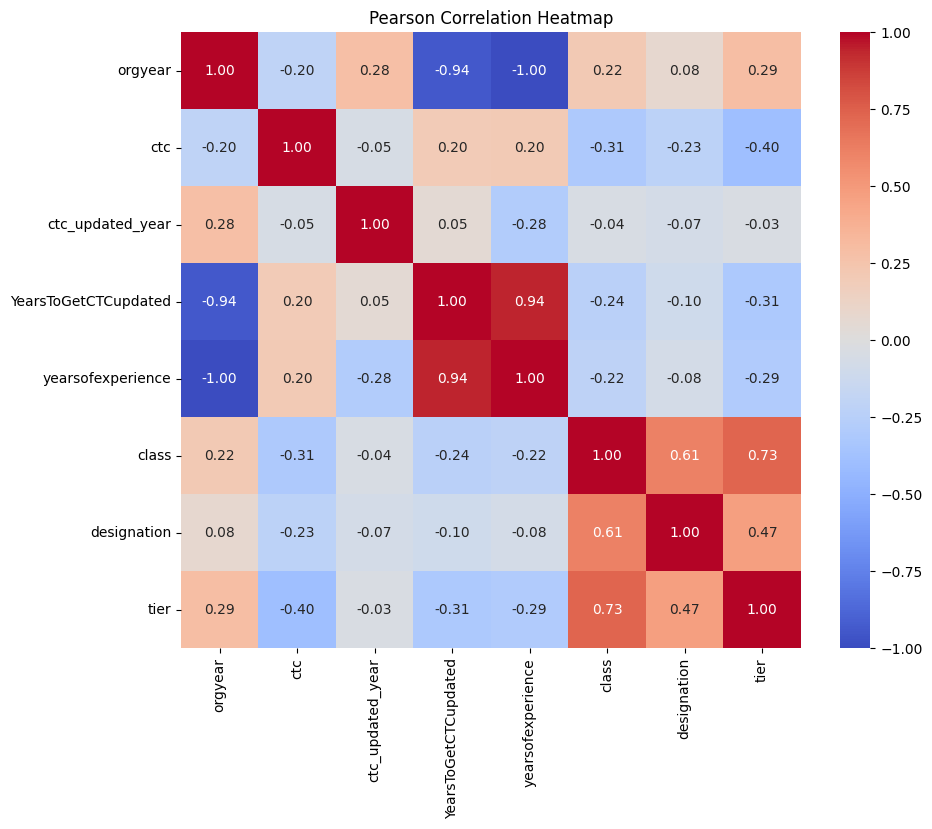

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the Pearson correlation matrix
correlation_matrix = df_cjy_cj_c[['orgyear', 'ctc', 'ctc_updated_year',
       'YearsToGetCTCupdated', 'yearsofexperience', 'class',
       'designation', 'tier']].corr(method='pearson')

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Pearson Correlation Heatmap')
plt.show()

In [106]:
#Lets drop the highly correlated features
df_cjy_cj_c.drop(["YearsToGetCTCupdated","orgyear"],inplace=True,axis=1)
df_cjy_cj_c.shape

(124883, 8)

In [107]:
df_cjy_cj_c.nunique()

company_hash         3761
ctc                  2257
ctc_updated_year        7
yearsofexperience      47
job_position          585
class                   3
designation             3
tier                    3
dtype: int64

In [108]:
#Lets also drop company_hash and job_position columns beacuase we have already used them to create new features
df_cjy_cj_c.drop(["company_hash","job_position","ctc_updated_year"],inplace=True,axis=1)
df_cjy_cj_c.shape

(124883, 5)

# **Standardization**

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df2 = pd.DataFrame(scaler.fit_transform(df_cjy_cj_c), columns=df_cjy_cj_c.columns)
df2


,ctc,yearsofexperience,class,designation,tier
0,-0.361852,-0.299936,-0.034364,-0.857900,0.988121
1,-0.002080,-0.551610,-0.034364,0.259077,-0.186028
2,-0.002080,-0.551610,-0.034364,0.259077,-0.186028
3,-0.217943,-0.551610,1.094974,1.376055,0.988121
4,0.069875,-0.551610,-0.034364,-0.857900,-0.186028
...,...,...,...,...,...
124878,-0.469784,-0.803284,1.094974,1.376055,0.988121
124879,-0.649670,-1.054958,1.094974,1.376055,0.988121
124880,-0.649670,-1.054958,1.094974,1.376055,0.988121
124881,-0.289898,-1.054958,-0.034364,-0.857900,-0.186028


# **KMeans++**

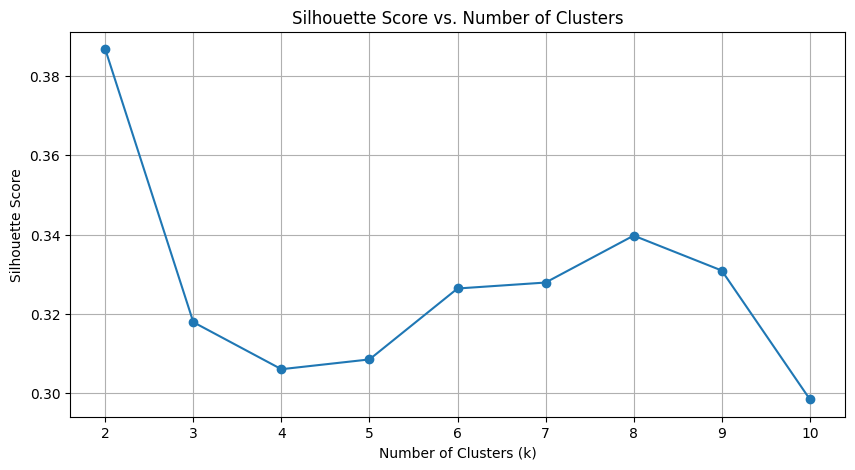

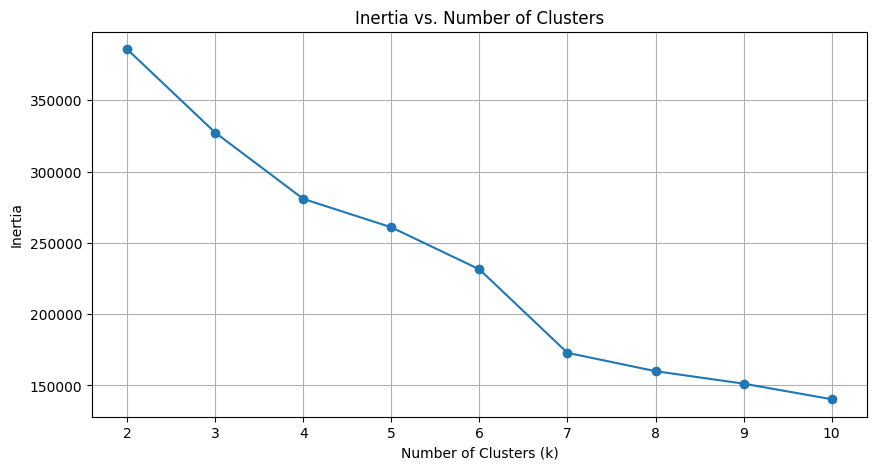

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#range of k values to try
k_values = range(2, 11)

# Initialize lists to store silhouette scores and inertias
silhouette_scores = []
inertias = []

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2)

    # Compute silhouette score
    silhouette_scores.append(silhouette_score(df2, kmeans.labels_))

    # Compute inertia
    inertias.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot inertia
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Insight:-**
Silhouette score should be as high and inertia should have that elbow point. The best k value satisfying these conditions is at k=7. So 7 clusters would be ideal for us.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Perform K-means++ clustering with k=7
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(df2)

# Invert the standardization to get cluster centers on original scale
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

centroids_original_scale

array([[1.09215525e+06, 5.79535797e+00, 1.50008017e+00, 1.14848072e+00,
        2.36266335e+00],
       [1.39447998e+06, 1.00024128e+01, 2.10990931e+00, 2.65671021e+00,
        1.93227390e+00],
       [2.36733394e+06, 1.44703820e+01, 1.23351238e+00, 1.15793793e+00,
        1.23105043e+00],
       [8.85365410e+05, 5.54184489e+00, 2.92125741e+00, 1.36650348e+00,
        2.85143004e+00],
       [1.91175313e+06, 6.27689259e+00, 1.09645790e+00, 1.07451894e+00,
        1.01903828e+00],
       [7.19281176e+05, 5.81736546e+00, 2.96231714e+00, 3.00000000e+00,
        2.95862722e+00],
       [1.21276250e+08, 6.00000000e+00, 1.12500000e+00, 1.00000000e+00,
        1.00000000e+00]])

In [140]:
cluster_labels = kmeans.predict(df2)

# Invert the standardization of df2 to get cluster data on original scale
df_original_scale = pd.DataFrame(scaler.inverse_transform(df2), columns=df2.columns)

# Add cluster labels to df_clustered_original_scale
df_original_scale['Cluster'] = cluster_labels

df_original_scale

,ctc,yearsofexperience,class,designation,tier,Cluster
0,800000.0,6.0,2.0,1.0,3.0,0
1,1300000.0,5.0,2.0,2.0,2.0,0
2,1300000.0,5.0,2.0,2.0,2.0,0
3,1000000.0,5.0,3.0,3.0,3.0,5
4,1400000.0,5.0,2.0,1.0,2.0,0
...,...,...,...,...,...,...
124878,650000.0,4.0,3.0,3.0,3.0,5
124879,400000.0,3.0,3.0,3.0,3.0,5
124880,400000.0,3.0,3.0,3.0,3.0,5
124881,900000.0,3.0,2.0,1.0,2.0,0


In [141]:
df_original_scale["Cluster"].value_counts()

Cluster
5    30630
0    24974
4    24485
3    19405
2    13396
1    11985
6        8
Name: count, dtype: int64

In [142]:
centroid_cluster_labels = kmeans.predict(scaler.transform(centroids_original_scale))
centroid_cluster_labels

c:\Users\prana\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\prana\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1, 2, 3, 4, 5, 6])

In [143]:
#Lets store name of categorical colums of our df which will help us draw plots
cat_cols=["class","designation","tier"]


# **Vizualizing the clusters to gain Insights**

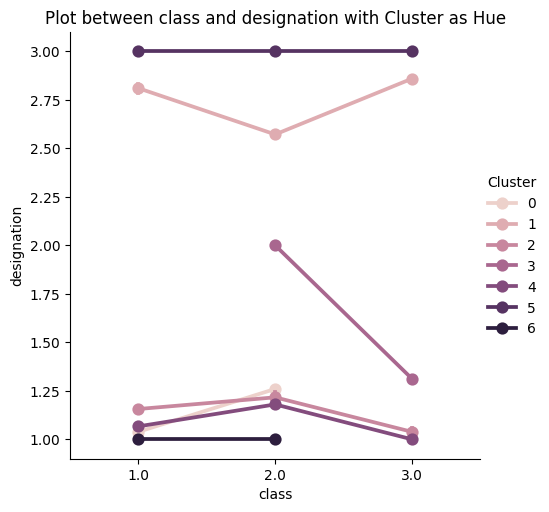

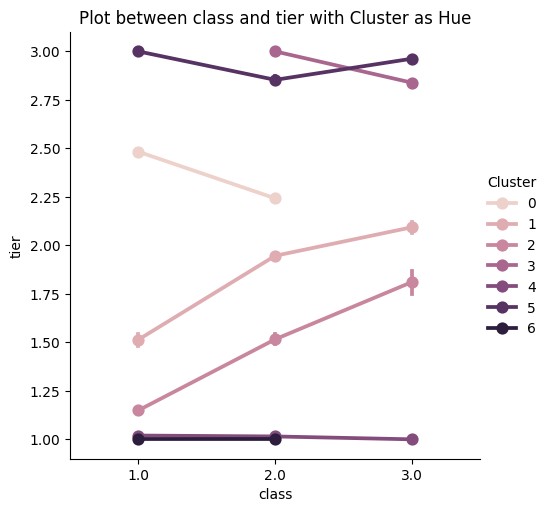

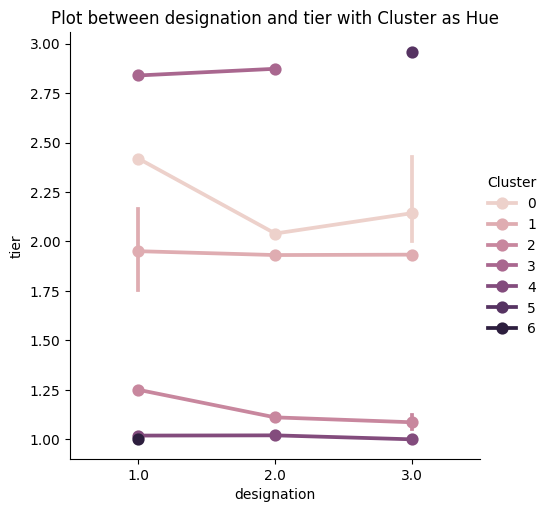

In [144]:
#Lets draw catplot between all our categorical columns with hue as Cluster

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Generate unique combinations of column pairs
column_combinations = list(combinations(cat_cols, 2))

# Plot each unique combination of columns
for x_col, y_col in column_combinations:
    # Plot using seaborn's catplot
    sns.catplot(x=x_col, y=y_col, hue='Cluster', data=df_original_scale, kind='point')

    # Set title
    plt.title(f'Plot between {x_col} and {y_col} with Cluster as Hue')

    # Show plot
    plt.show()

**Insights from above graphs:-**

**1)From first graph:-**


Cluster0,2,4 has designation values around 1.25 accross all class values. This means designation values in all these 3 clusters is 1 in most rows.

Cluster3 has designation values from 1.4 to 2 accross class values equal to 2 & 3. Cluster3 does not have any row with class=1.

Cluster1 has designation values from 2.5 to 2.75 accross all class values. This means most designation values in this cluster is equal to 3.

Cluster5 has all values of designation equal to 3 accross all class values.

Cluster6 has designation=1 for class=1 & 2.

**2)From Second graph:-**

Cluster0 has tier=2.5 for class=1 & tier=2.25 for class=2.

Cluster1 has Tier=1.5 for class=1(means equal no. of tier value 1&2). Tier=2 for class=2. Tier=2.1 for class=3(this means most values of tier=2 & very few values of tier=3)

Tier value of cluster2 is 1.1 for class=1. This means almost all values of tier=1 for class=1. Tier value equal to 1.5 for class=2, which means there are almost equal tier values 1 & 2 for classs=2. AND tier value equal to 1.75 for class=3, which means most values of tier equal to 2.

Cluster3 has tier value around 3 for class=2&3.

Cluster4 has tier=1 across all class values.

For Cluster5, tier almost equal to 3 for all values of class.

Cluster6 has tier=1 for class=1 & 2.

**3)From Third graph:-**

Cluster0 has tier=2.5 for designation=1. And tier value equal to 2 for designation=2&3.

Cluster1 has tier=2 across all designation values.

Cluster2 has tier value around 1.1 across all designation values.

Cluster3 has tier value around 3 for designation=1&2.

Cluster5 has tier & designation value equal to 3.

Cluster4 has tier=1 for across all designation values.

Cluster6 has tier & designation value equal to 1.







In [146]:
df_original_scale["yearsofexperience"].max()

52.0

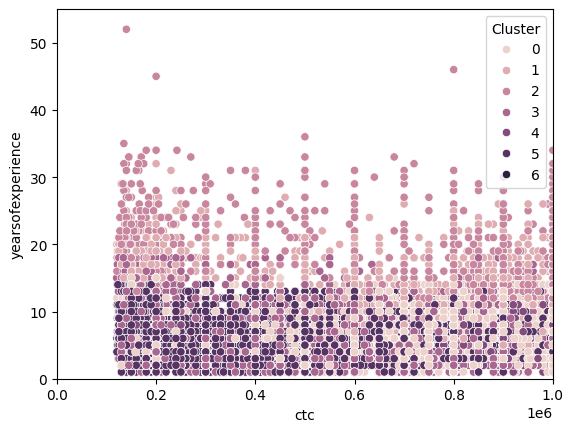

In [147]:
# Draw scatter plot
sns.scatterplot(data=df_original_scale, x='ctc', y='yearsofexperience', hue='Cluster')

# Set x-axis limit
plt.xlim(0, 1e6)

# Set y-axis limit
plt.ylim(0, 55)

# Show plot
plt.show()

**Insights:-**
Cluster5 has low ctc and they have work experience less than 15. Same is the case with cluster0.

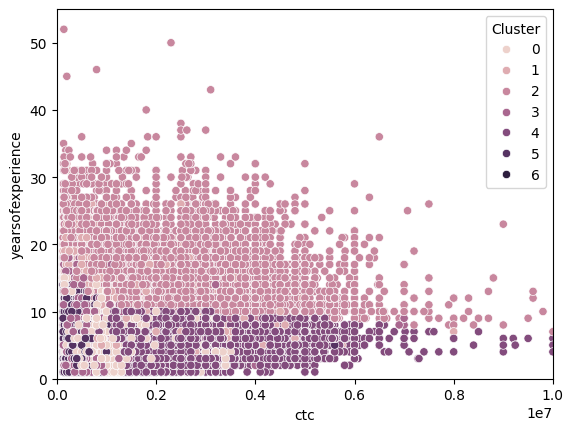

In [148]:
# Draw scatter plot
sns.scatterplot(data=df_original_scale, x='ctc', y='yearsofexperience', hue='Cluster')

# Set x-axis limit
plt.xlim(0, 1e7)

# Set y-axis limit
plt.ylim(0, 55)

# Show plot
plt.show()

**Insights:-**
Cluster4 has high ctc and they are very young(i.e years of experience is less than 10).

Cluster2 has high ctc and work experience greater than 10 years.


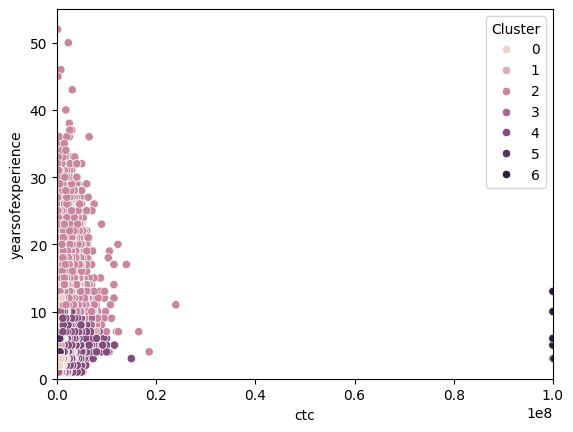

In [149]:
# Draw scatter plot
sns.scatterplot(data=df_original_scale, x='ctc', y='yearsofexperience', hue='Cluster')

# Set x-axis limit
plt.xlim(0, 1e8)

# Set y-axis limit
plt.ylim(0, 55)

# Show plot
plt.show()

**Insights:-**
Cluster4 has points which has very high ctc and work experience less than 10 years.

Cluster2 has points which has very high ctc and work experience mroe than 10 years.

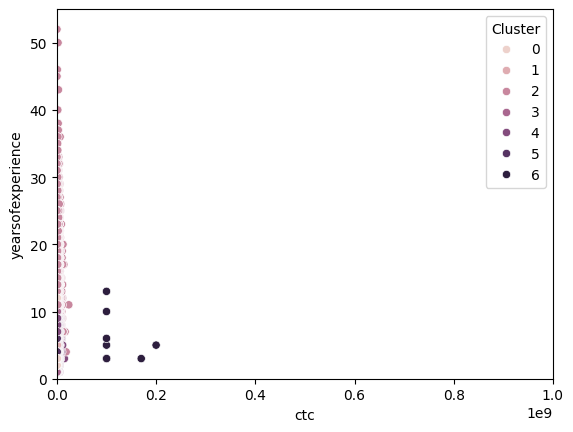

In [165]:
# Draw scatter plot
sns.scatterplot(data=df_original_scale, x='ctc', y='yearsofexperience', hue='Cluster')

# Set x-axis limit
plt.xlim(0, 1e9)

# Set y-axis limit
plt.ylim(0, 55)

# Show plot
plt.show()

**Insights:-**
Cluster6 has points which has very very high ctc (in 1e8). These cluster consists of only 8 points which can be seen in above graph.

In [127]:
# !pip install statsmodels


designation        1.0        2.0       3.0
class                                      
1.0          48.033955   1.881957  0.028029
2.0          37.050533  13.005526  0.000000


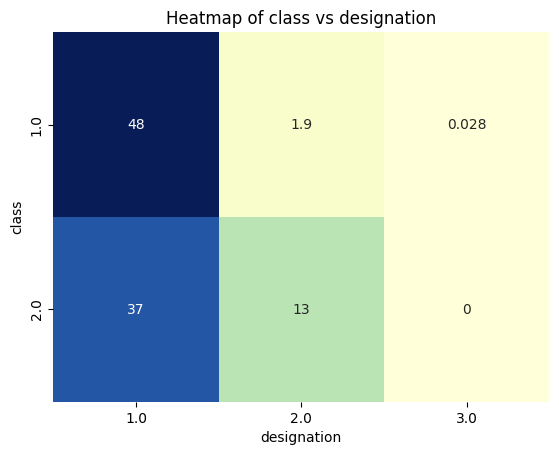

tier         2.0        3.0
class                      
1.0    25.838872  24.105069
2.0    37.919436  12.136622


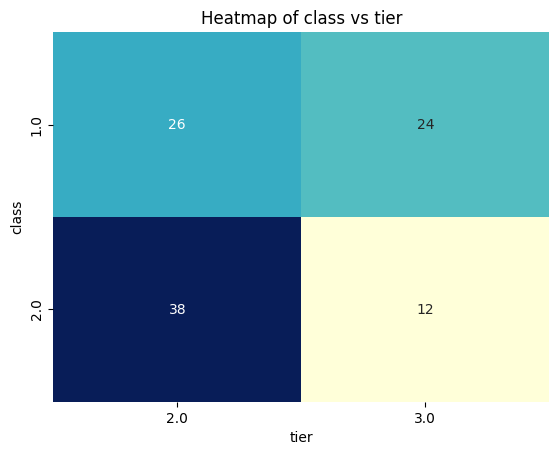

tier               2.0        3.0
designation                      
1.0          49.443421  35.641067
2.0          14.290862   0.596620
3.0           0.024025   0.004004


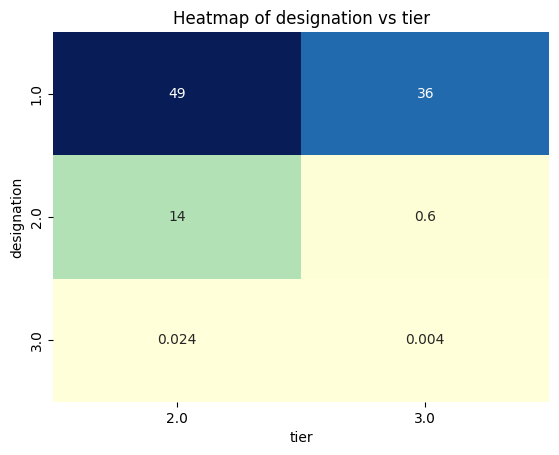

In [169]:
# Creating a contingency table with normalized percentages
# Normalize by the values to get overall percentages

first_cluster = df_original_scale[df_original_scale["Cluster"]==0]
# # Generate unique combinations of column pairs
column_combinations = list(combinations(cat_cols, 2))

for x_col, y_col in column_combinations:
    # Normalize by row
    contingency_table_percentage_row = pd.crosstab(first_cluster[x_col], first_cluster[y_col], normalize='all') * 100
    print(contingency_table_percentage_row)
    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {x_col} vs {y_col}')
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.show()


# *Insights of cluster0:-*
In first graph, we can see there are almost no values with class=3 and designation=3. Most values have class=1or2 & designation=1.

In second graph, no. of values class=1 & class=2 are almost same but no.of values with tier=2 is high as compared to tier=3 values.

In third graph, most values belong to designation=1 & tier equal to 2 or 3.


designation      1.0        2.0        3.0
class                                     
1.0          0.00000   1.977472   8.443888
2.0          0.00000  29.169796  38.973717
3.0          0.50897   1.994159  18.931998


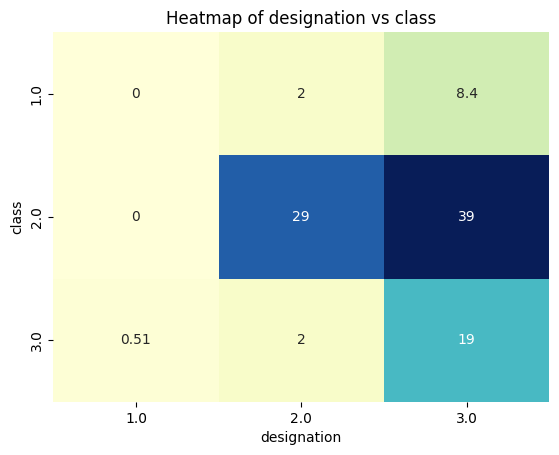

tier        1.0        2.0       3.0
class                               
1.0    5.264914   4.956195  0.200250
2.0    8.360451  55.085524  4.697539
3.0    3.954944  11.522737  5.957447


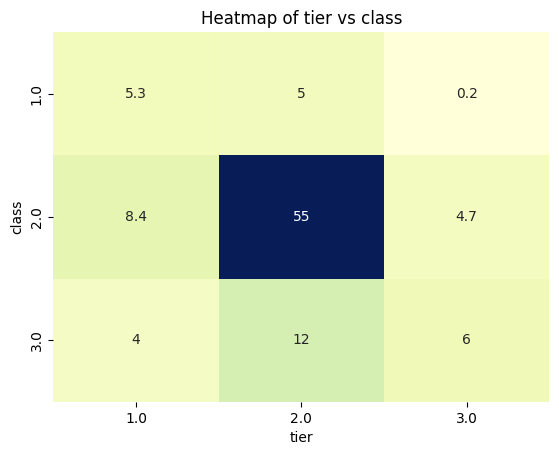

tier               1.0        2.0       3.0
designation                                
1.0           0.191907   0.150188  0.166875
2.0           3.913225  27.592824  1.635378
3.0          13.475177  43.821443  9.052983


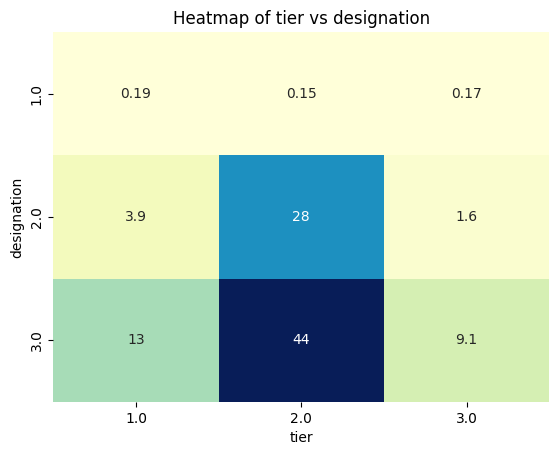

In [170]:
# # Lets see frequency heatmap of all categorical variables for Second Cluster
second_cluster = df_original_scale[df_original_scale["Cluster"]==1]

for x_col, y_col in column_combinations:
    # Normalize by row
    contingency_table_percentage_row = pd.crosstab(second_cluster[x_col], second_cluster[y_col], normalize='all') * 100
    print(contingency_table_percentage_row)
    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {y_col} vs {x_col}')
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.show()



# *Insights of cluster1:-*

In the first graph, most percentage of values have class=2 and designation=2or3.

In the second graph, majiority of values has class=2 & tier=2.

In the third graph, majiority of values have tier=2 & designation=2or3.

designation        1.0       2.0       3.0
class                                     
1.0          71.118244  9.487907  1.687071
2.0           9.905942  1.769185  0.425500
3.0           5.441923  0.111974  0.052254


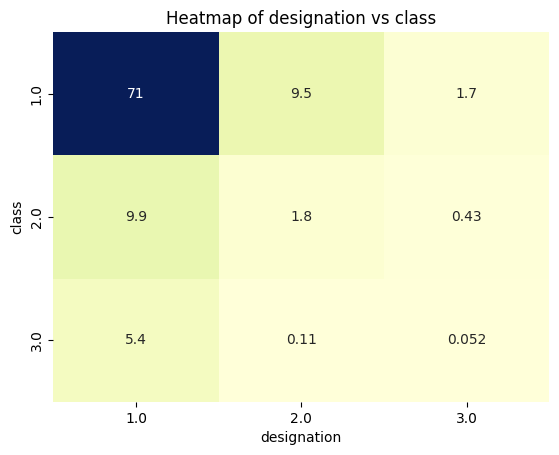

tier         1.0       2.0       3.0
class                               
1.0    71.431771  9.420723  1.440729
2.0     6.307853  5.344879  0.447895
3.0     2.605255  1.455658  1.545237


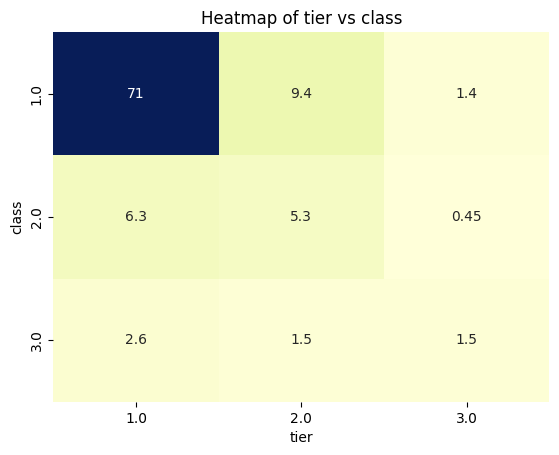

tier               1.0        2.0       3.0
designation                                
1.0          68.214392  14.862646  3.389071
2.0          10.137354   1.201851  0.029860
3.0           1.993132   0.156763  0.014930


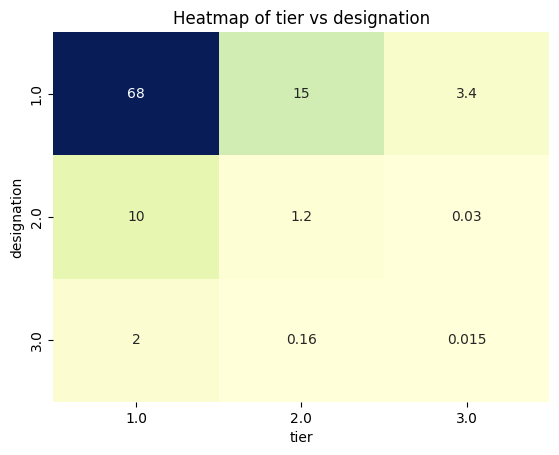

In [171]:
# # Lets see frequency heatmap of all categorical variables for third Cluster
third_cluster = df_original_scale[df_original_scale["Cluster"]==2]

for x_col, y_col in column_combinations:
    # Normalize all values to get the percentages
    contingency_table_percentage_row = pd.crosstab(third_cluster[x_col], third_cluster[y_col], normalize='all') * 100
    print(contingency_table_percentage_row)
    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {y_col} vs {x_col}')
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.show()


# *Insights of cluster2:-*
From the all three graphs above, majiority of values have class=1, tier=1 & designation=1.



designation        1.0        2.0
class                            
2.0           0.000000   7.863953
3.0          63.344499  28.791549


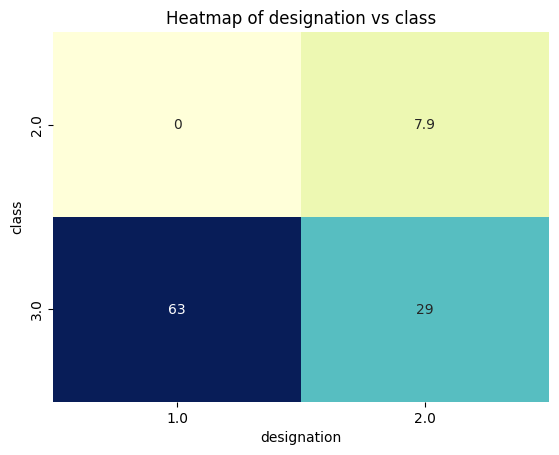

tier        1.0        2.0        3.0
class                                
2.0    0.000000   0.000000   7.863953
3.0    0.345272  14.181912  77.608864


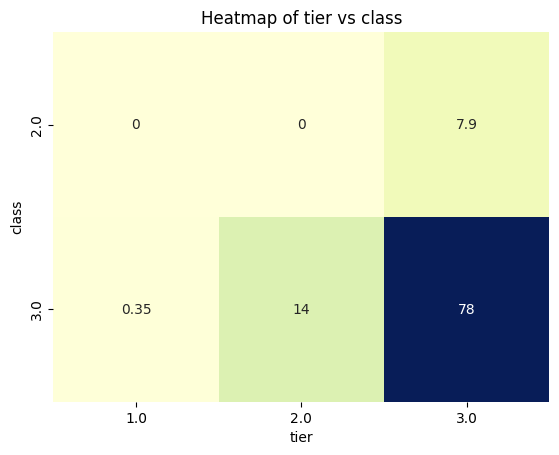

tier              1.0       2.0        3.0
designation                               
1.0          0.345272  9.513012  53.486215
2.0          0.000000  4.668900  31.986601


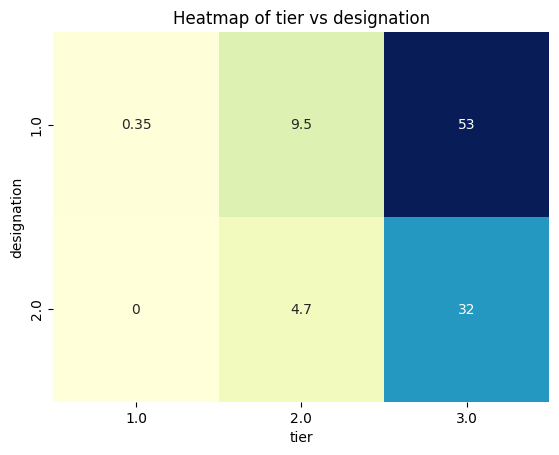

In [172]:
# # Lets see frequency heatmap of all categorical variables for fourth Cluster
fourth_cluster = df_original_scale[df_original_scale["Cluster"]==3]

for x_col, y_col in column_combinations:
    # Normalize all values to get the percentages
    contingency_table_percentage_row = pd.crosstab(fourth_cluster[x_col], fourth_cluster[y_col], normalize='all') * 100
    print(contingency_table_percentage_row)
    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {y_col} vs {x_col}')
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.show()



# *Insights on cluster3:-*
From the above graphs, we can see that majiority of values have designation=1,tier=3 & class=3.




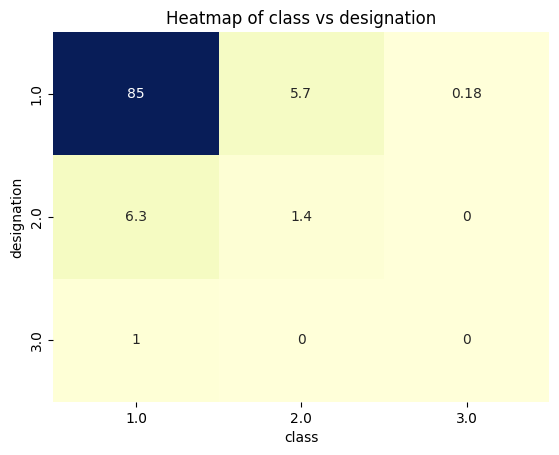

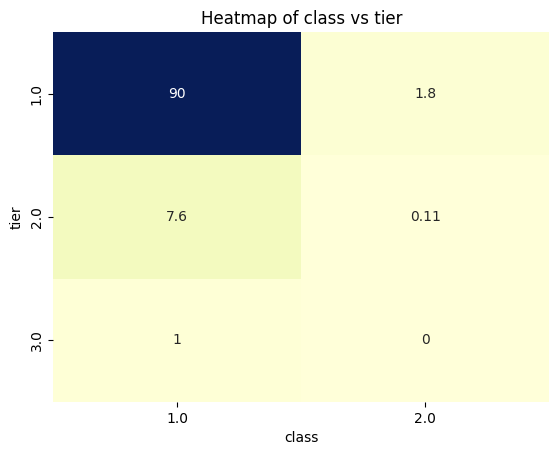

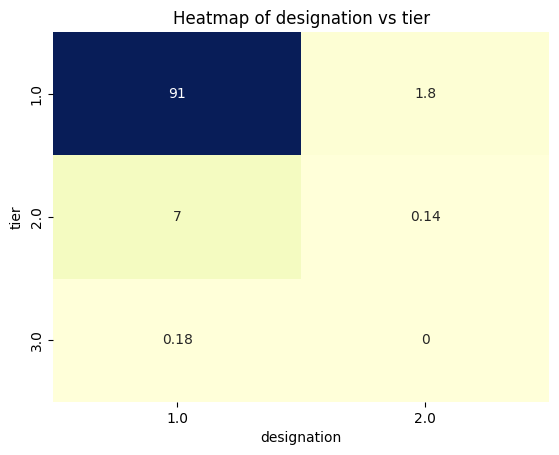

In [155]:
# # Lets see frequency heatmap of all categorical variables for fifth Cluster
fifth_cluster = df_original_scale[df_original_scale["Cluster"]==4]

for x_col, y_col in column_combinations:
    # Normalize all values to get the percentages
    contingency_table_percentage_row = pd.crosstab(fifth_cluster[x_col], fifth_cluster[y_col], normalize='all') * 100

    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# *Insights on cluster4:-*
From the above graphs, we can see that majiority(85to90%) of values have designation=1,tier=1 & class=1.

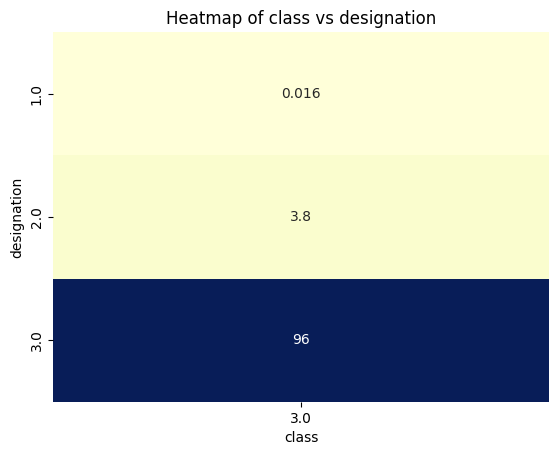

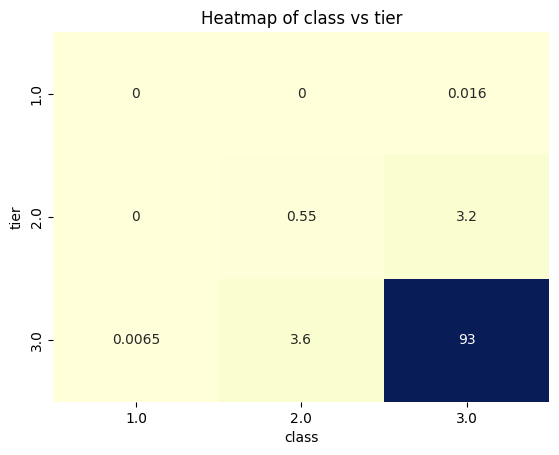

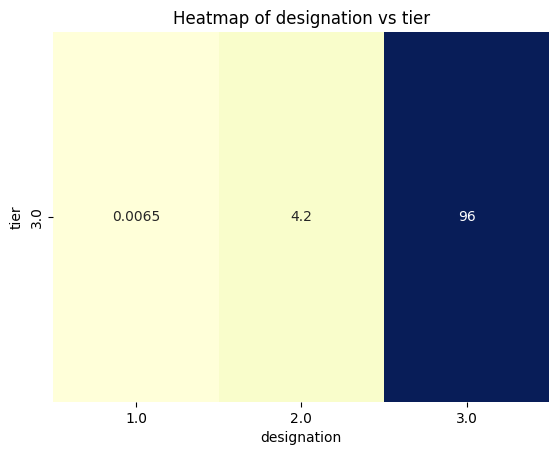

In [156]:
# # Lets see frequency heatmap of all categorical variables for sixth Cluster
sixth_cluster = df_original_scale[df_original_scale["Cluster"]==5]

for x_col, y_col in column_combinations:
    # Normalize all values to get the percentages
    contingency_table_percentage_row = pd.crosstab(sixth_cluster[x_col], sixth_cluster[y_col], normalize='all') * 100

    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# *Insights on cluster5:-*
From the above graphs, we can see that majiority of values have designation=3,tier=3 & class=3.

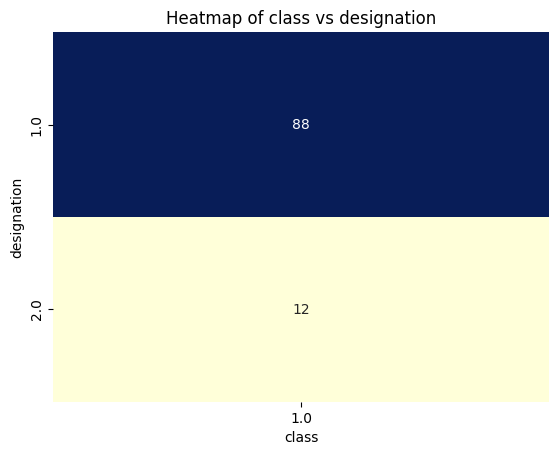

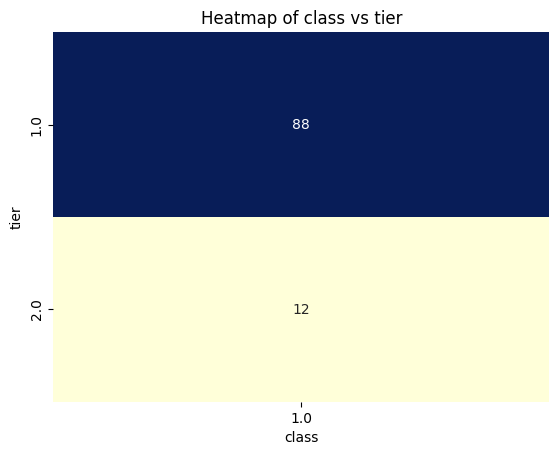

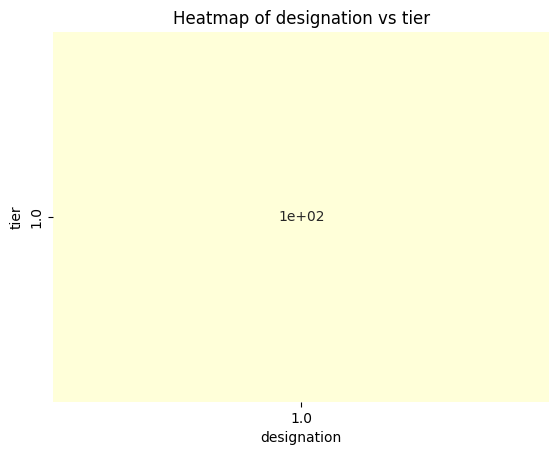

In [157]:
# # Lets see frequency heatmap of all categorical variables for seventh Cluster
fourth_cluster = df_original_scale[df_original_scale["Cluster"]==6]

for x_col, y_col in column_combinations:
    # Normalize all values to get the percentages
    contingency_table_percentage_row = pd.crosstab(fourth_cluster[x_col], fourth_cluster[y_col], normalize='all') * 100

    sns.heatmap(contingency_table_percentage_row, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f'Heatmap of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# *Insights on cluster6:-*
From the above graphs, we can see that majiority of values have designation=1,tier=1 & class=1.

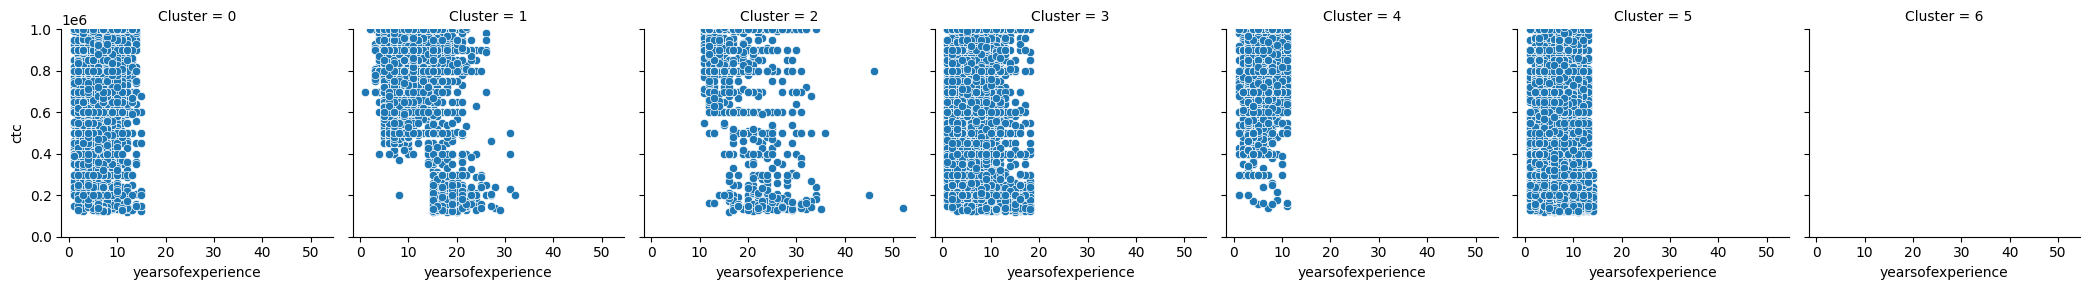

In [174]:
# Creating a FacetGrid for scatter plot
g = sns.FacetGrid(df_original_scale, col="Cluster", margin_titles=True)
g.map(sns.scatterplot, "yearsofexperience", "ctc")
# Set y-axis limit for ctc
g.set(ylim=(0, 1e6))
plt.show()


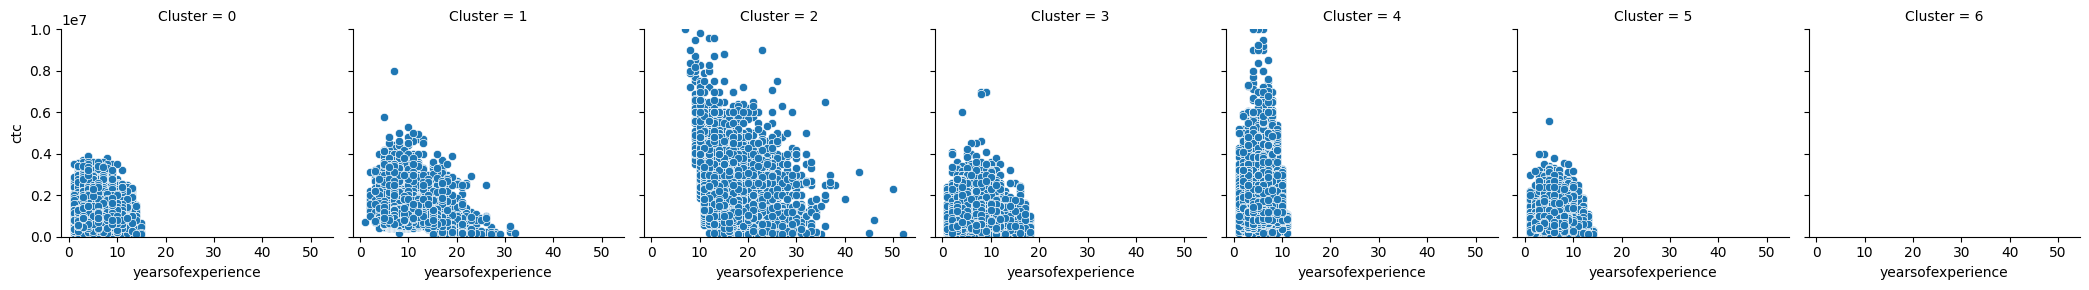

In [175]:
# Creating a FacetGrid for scatter plot
g = sns.FacetGrid(df_original_scale, col="Cluster", margin_titles=True)
g.map(sns.scatterplot, "yearsofexperience", "ctc")
# Set y-axis limit for ctc
g.set(ylim=(0, 1e7))
plt.show()

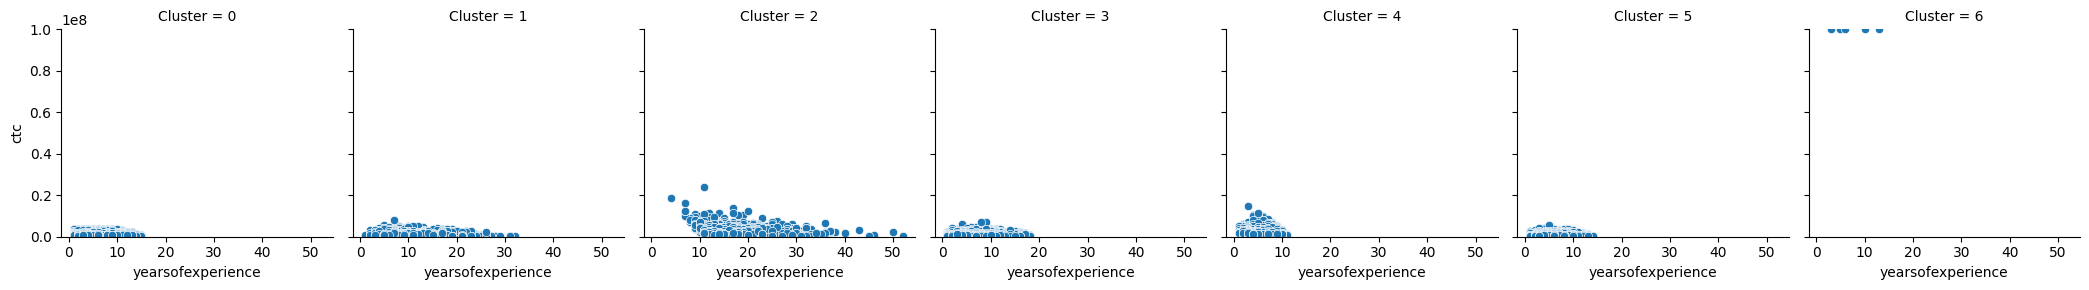

In [176]:
# Creating a FacetGrid for scatter plot
g = sns.FacetGrid(df_original_scale, col="Cluster", margin_titles=True)
g.map(sns.scatterplot, "yearsofexperience", "ctc")
# Set y-axis limit for ctc
g.set(ylim=(0, 1e8))
plt.show()

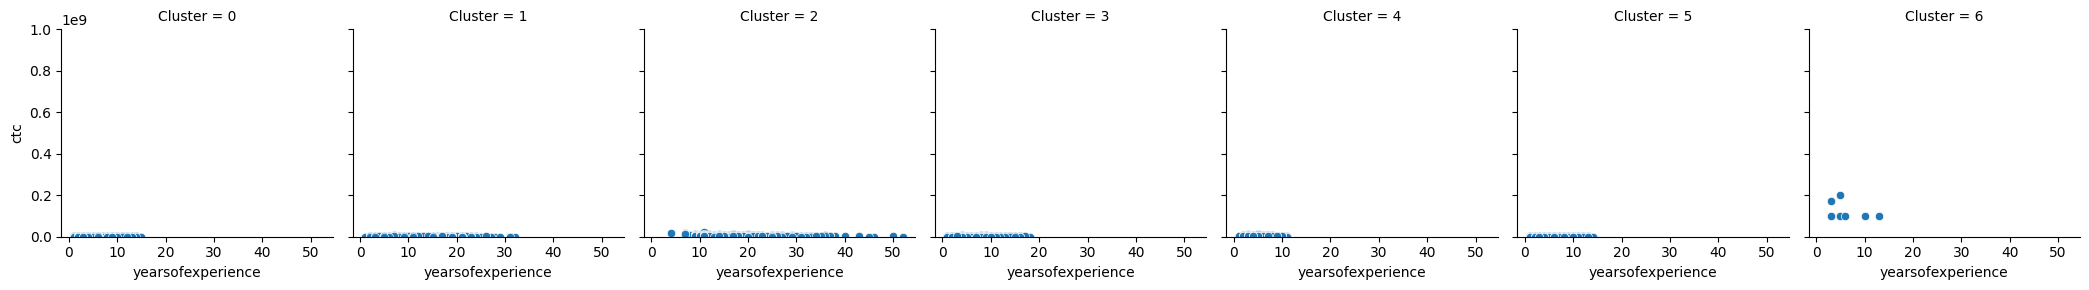

In [177]:
# Creating a FacetGrid for scatter plot
g = sns.FacetGrid(df_original_scale, col="Cluster", margin_titles=True)
g.map(sns.scatterplot, "yearsofexperience", "ctc")
# Set y-axis limit for ctc
g.set(ylim=(0, 1e9))
plt.show()

**Insights from above four graphs:-**

For low ctc (i.e in 1e6), all clusters have lot of values except cluster6(seventh cluster).
Cluster0,3,4&5 have points with yearsofexperience less than 20. But Cluster1&2 has values with yearsofexperience more than 20years also.

For High ctc (i.e in 1e7), there is lot of reduction in number of points in cluster0,3&5. This means these clusters does not have lot of people with high ctc as compared to other clusters.

For very high ctc(i.e in 1e8), there is again reduction in number of points seen in cluster0,3&5. This means these clusters have very few people with very high ctc compared to other clusters.

For very very high ctc (i.e in 1e9), there is points in only cluster6.

# ***Conclusion***

**Based on insights, i can conclude that our target customers for scaler courses are in First cluster (cluster==0), Fourth cluster (cluster==3), Sixth cluster (cluster==5).**

**First priority should be given to Fourth and sixth clusters because it has majiority of values which has tier,designation & class values equal to 3 & few points with high or very high ctc. Also people in this cluster are not old (i.e yearsofexperience less than 20 years) so they might be open to learning more in order upskill and get better ctc.**

**Second priority, should be given to First cluster because it also has few points with high or very high ctc. But majiority of values in this cluster has designation=1,class=1or2 & tier=1or2. In this cluster also yearsofexperience is less than 20 years.**